In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plotly'

In [3]:
##Reading the csv data using Pandas
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
##Brief overview of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
##Function to give insights into the features in more detail
## It gives the Min, Max, Mean and Standard Dev of the distribution for continuous features
## and the number of distinct categories for categorical features (except the boolean ones)

def explore_columns(df):
    for col in df.columns:
        if type(df[col][0]) in [np.int64,np.float64]:
            print(f'Col: {col}\n dtype: {type(df[col][0])}')
            print(f'Min: {np.min(df[col])}\n Max: {np.max(df[col])}\n Mean: {np.mean(df[col])}\n StdDev: {np.std(df[col])}')
            print('\n -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- \n')
        elif type(df[col][0])==bool:
            pass
        else:
            print(f'Col: {col}\n dtype: {type(df[col][0])}')
            print(f'NumCategories: {df[col].nunique()}')
            print('\n -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- \n')

explore_columns(df)

Col: Administrative
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 27
 Mean: 2.3151662611516626
 StdDev: 3.32164940009589

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Administrative_Duration
 dtype: <class 'numpy.float64'>
Min: 0.0
 Max: 3398.75
 Mean: 80.81861053933578
 StdDev: 176.77193866707827

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Informational
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 24
 Mean: 0.5035685320356853
 StdDev: 1.270104918190283

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: Informational_Duration
 dtype: <class 'numpy.float64'>
Min: 0.0
 Max: 2549.375
 Mean: 34.47239792772309
 StdDev: 140.74358671139055

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: ProductRelated
 dtype: <class 'numpy.int64'>
Min: 0
 Max: 705
 Mean: 31.731467964314678
 StdDev: 44.473699719976125

 -X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X- 

Col: ProductRelated_Duration
 dtype: <c

<AxesSubplot:>

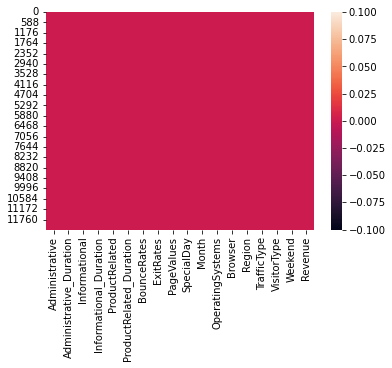

In [7]:
##Checking for null values
sns.heatmap(data=df.isnull())

In [8]:
##Checking whether or not 'Weekend' affects 'Revenue'

In [9]:
##The code below gives us the fraction of sessions that led to revenue for 'Weekend'=Yes and 'Weekend'=No respectively
df.groupby('Weekend').mean()['Revenue']

Weekend
False    0.148911
True     0.173989
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='Weekend'>

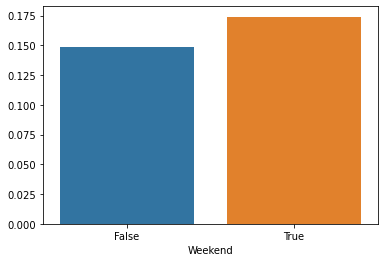

In [10]:
##The barplot below plots the fraction against the respective categories
sns.barplot(x=df.groupby('Weekend').mean()['Revenue'].index, y=df.groupby('Weekend').mean()['Revenue'].values)

In [11]:
##Studying 'VisitorType' against 'Revenue'

In [12]:
##The following line of code gives us the fraction of sessions that led to revenue for a particular visitior type
df.groupby('VisitorType').mean()['Revenue']

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='VisitorType'>

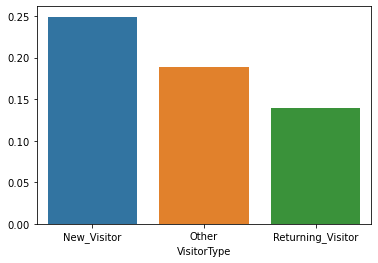

In [13]:
##Barplot plotting the fraction against 'VisitorType'
sns.barplot(x=df.groupby('VisitorType').mean()['Revenue'].index, y=df.groupby('VisitorType').mean()['Revenue'].values)

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
##Studying 'Revenue' against 'Operating System'

<AxesSubplot:xlabel='OperatingSystems'>

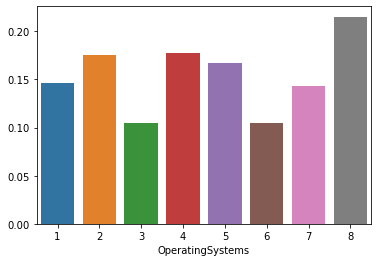

In [16]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'OperatingSystems'
sns.barplot(x=df.groupby('OperatingSystems').mean()['Revenue'].index, y=df.groupby('OperatingSystems').mean()['Revenue'].values)

In [17]:
##Studying 'Revenue' against 'Region'

<AxesSubplot:xlabel='Region'>

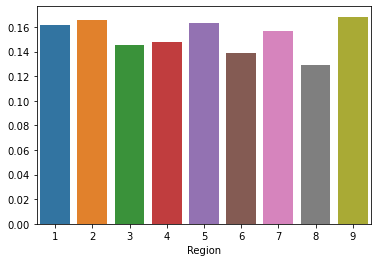

In [18]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'Region'
sns.barplot(x=df.groupby('Region').mean()['Revenue'].index, y=df.groupby('Region').mean()['Revenue'].values)

In [19]:
##Studying 'Revenue' against 'Browser'

<AxesSubplot:xlabel='Browser'>

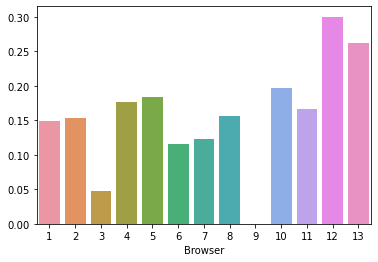

In [20]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'Browser'
sns.barplot(x=df.groupby('Browser').mean()['Revenue'].index, y=df.groupby('Browser').mean()['Revenue'].values)

In [21]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [22]:
##Studying 'Revenue' against 'TrafficType'

<AxesSubplot:xlabel='TrafficType'>

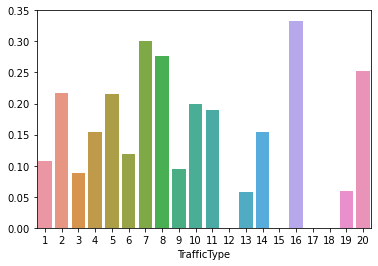

In [23]:
##The following line of code plots the fraction of sessions that led to 'Revenue' for categories in 'TrafficType'
sns.barplot(x=df.groupby('TrafficType').mean()['Revenue'].index, y=df.groupby('TrafficType').mean()['Revenue'].values)

In [24]:
##Studying 'Revenue' against 'Month'

In [25]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month'>

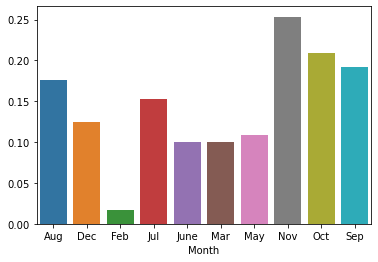

In [26]:
sns.barplot(x=df.groupby('Month').mean()['Revenue'].index, y=df.groupby('Month').mean()['Revenue'].values)